In [10]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

# solve LP
m = GEKKO(remote=False)
x1,x2 = m.Array(m.Var,2,lb=0)
m.Equations([6*x1+6*x2<=36000,10*x1+5*x2<=50000,x2<=4000,x1>=0,x2>=0])
m.Maximize(x1+x2)
m.solve(disp=False)
x1opt = x1.value[0]; x2opt = x2.value[0]
print('x1 = ',round(x1opt))
print('x2 = ',round(x2opt))
print('z = ',round(x1opt+x2opt))

x1 =  4000
x2 =  2000
z =  6000


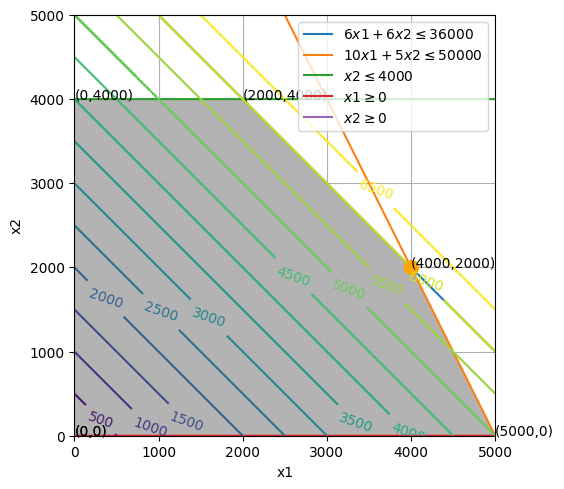

In [22]:
# visualize solution
g = np.linspace(0,5000,2000)
x,y = np.meshgrid(g,g)
obj = x+y
plt.imshow(((6*x+6*y<=36000)&(10*x+5*y<=50000)&(y<=4000)&(x>=0)&(y>=0)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(0, 5000, 20000)
y0 = 6000-x0   # 6*x+4*y<=24
y1 = 10000-2*x0   # x+2*y<=6
y2 = 4000*np.ones_like(x0)
y3 = x0*0 # y <= 2

plt.plot(x0, y0, label=r'$6x1+6x2\leq36000$')
plt.plot(x0, y1, label=r'$10x1+5x2\leq50000$')
plt.plot(x0, y2, label=r'$x2\leq4000$')

plt.plot(x0, y3, label=r'$x1\geq0$')
plt.plot([0,0],[0,6], label=r'$x2\geq0$')
xv = [0,0,2000,round(x1opt),5000,0]; yv = [0,4000,4000,round(x2opt),0,0]
#plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
# objective contours
CS = plt.contour(x,y,obj,np.arange(0,7000,500))
plt.clabel(CS, inline=1, fontsize=10)
# optimal point
plt.plot([x1opt],[x2opt],marker='o',color='orange',markersize=10)
plt.xlim(0,5000); plt.ylim(0,5000); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x1'); plt.ylabel('x2')
plt.savefig('plot.png',dpi=300)
plt.show()

In [25]:
print("Rozwiązaniem zadania są punkty znajdujące się na prostej 6x1+6x2-36000=0 \nograniczone warunkami x2<=4000 i 10x1+5x2<=50000")

Rozwiązaniem zadania są punkty znajdujące się na prostej 6x1+6x2-36000=0 
ograniczone warunkami x2<=4000 i 10x1+5x2<=50000
